# Assignment 02: Learning from data and related challenges and classification


## 1. Logistic Regression

### 1

In [10]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset ("penguins")
df.dropna( inplace = True )

# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin( selected_classes )].copy() # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print (df_filtered[[ 'species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species', 'island', 'sex','class_encoded'] , axis =1)



       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


### 5

In [27]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)

#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression( solver ='saga')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print("Accuracy :", accuracy )
print( logreg.coef_ , logreg.intercept_ )



Accuracy : 0.5813953488372093
[[ 2.75424946e-03 -8.25729452e-05  4.69326998e-04 -2.86904037e-04]] [-8.47965024e-06]


c:\Users\Induwara Gayashan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(214, 4)

### 8

In [26]:

#Train the logistic regression model . Here we are using liblinear solver to learn weights .
logreg = LogisticRegression( solver ='liblinear')
logreg.fit( X_train , y_train )

# Predict on the testing data
y_pred = logreg.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print("Accuracy :", accuracy )
print( logreg.coef_ , logreg.intercept_ )

Accuracy : 1.0
[[ 1.5997544  -1.43222015 -0.15123497 -0.00401141]] [-0.07601213]


### 10

In [29]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder and encode the species column
le = LabelEncoder()
y = le.fit_transform(df_filtered['species'])  # Target variable

# Features (drop species, island, sex, and the encoded class)
X = df_filtered.drop(['species', 'island', 'sex'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# 1. Without Feature Scaling
print("=== Without Feature Scaling ===")

# liblinear solver
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)
print("liblinear Accuracy:", accuracy_liblinear)

# saga solver
logreg_saga = LogisticRegression(solver='saga')
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)
print("saga Accuracy:", accuracy_saga)

# 2. With Feature Scaling
print("\n=== With Feature Scaling ===")

# Apply scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# liblinear solver with scaling
logreg_liblinear_scaled = LogisticRegression(solver='liblinear')
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)
print("liblinear Accuracy (Scaled):", accuracy_liblinear_scaled)

# saga solver with scaling
logreg_saga_scaled = LogisticRegression(solver='saga')
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)
print("saga Accuracy (Scaled):", accuracy_saga_scaled)


=== Without Feature Scaling ===
liblinear Accuracy: 1.0
saga Accuracy: 0.5813953488372093

=== With Feature Scaling ===
liblinear Accuracy (Scaled): 0.9767441860465116
saga Accuracy (Scaled): 0.9767441860465116


c:\Users\Induwara Gayashan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 11

#### Wrong approach

In [30]:
import seaborn as sns
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import LabelEncoder
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import accuracy_score

# Load the penguins dataset
df = sns . load_dataset ("penguins")
df . dropna ( inplace = True )

# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df [ df ['species']. isin ( selected_classes ) ].copy () # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder ()

# Encode the species column
y_encoded = le . fit_transform ( df_filtered ['species'])
df_filtered ['class_encoded'] = y_encoded
df_filtered . head ()
X = df_filtered . drop ([ 'species', 'class_encoded'] , axis =1)
y = df_filtered ['class_encoded'] # Target variable
X . head ()

# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)
logreg = LogisticRegression ( solver ='saga')
logreg . fit ( X_train , y_train )

# Predict on the testing data
y_pred = logreg . predict ( X_test )

# Evaluate the model
accuracy = accuracy_score ( y_test , y_pred )
print (" Accuracy :", accuracy )
print ( logreg . coef_ , logreg . intercept_ )

ValueError: could not convert string to float: 'Dream'

#### Correct approach

In [31]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder for the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Drop the target variable columns from features (X)
X = df_filtered.drop(['species', 'class_encoded'], axis=1)

# One-hot encode the categorical features (island, sex, etc.)
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(solver='saga', max_iter=5000)
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 0.7209302325581395
Coefficients: [[ 0.11047011 -0.00669495 -0.01178007 -0.0008487   0.00813612 -0.00471199
   0.00061357]]
Intercept: [-0.00057599]


c:\Users\Induwara Gayashan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 2. Logistic regression on real world data

### 1

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 




{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

### 2

C:\Users\Induwara Gayashan\AppData\Local\Temp\ipykernel_15836\2641870424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y  # Add the target variable to the dataframe


                    word_freq_internet  word_freq_order  word_freq_credit  \
word_freq_internet            1.000000         0.105302          0.109163   
word_freq_order               0.105302         1.000000          0.123217   
word_freq_credit              0.109163         0.123217          1.000000   
word_freq_free                0.051115         0.008269          0.027665   
word_freq_receive             0.128495         0.137760          0.155769   
target                        0.206808         0.231551          0.189761   

                    word_freq_free  word_freq_receive    target  
word_freq_internet        0.051115           0.128495  0.206808  
word_freq_order           0.008269           0.137760  0.231551  
word_freq_credit          0.027665           0.155769  0.189761  
word_freq_free            1.000000           0.098711  0.263215  
word_freq_receive         0.098711           1.000000  0.234529  
target                    0.263215           0.234529  1.000000 

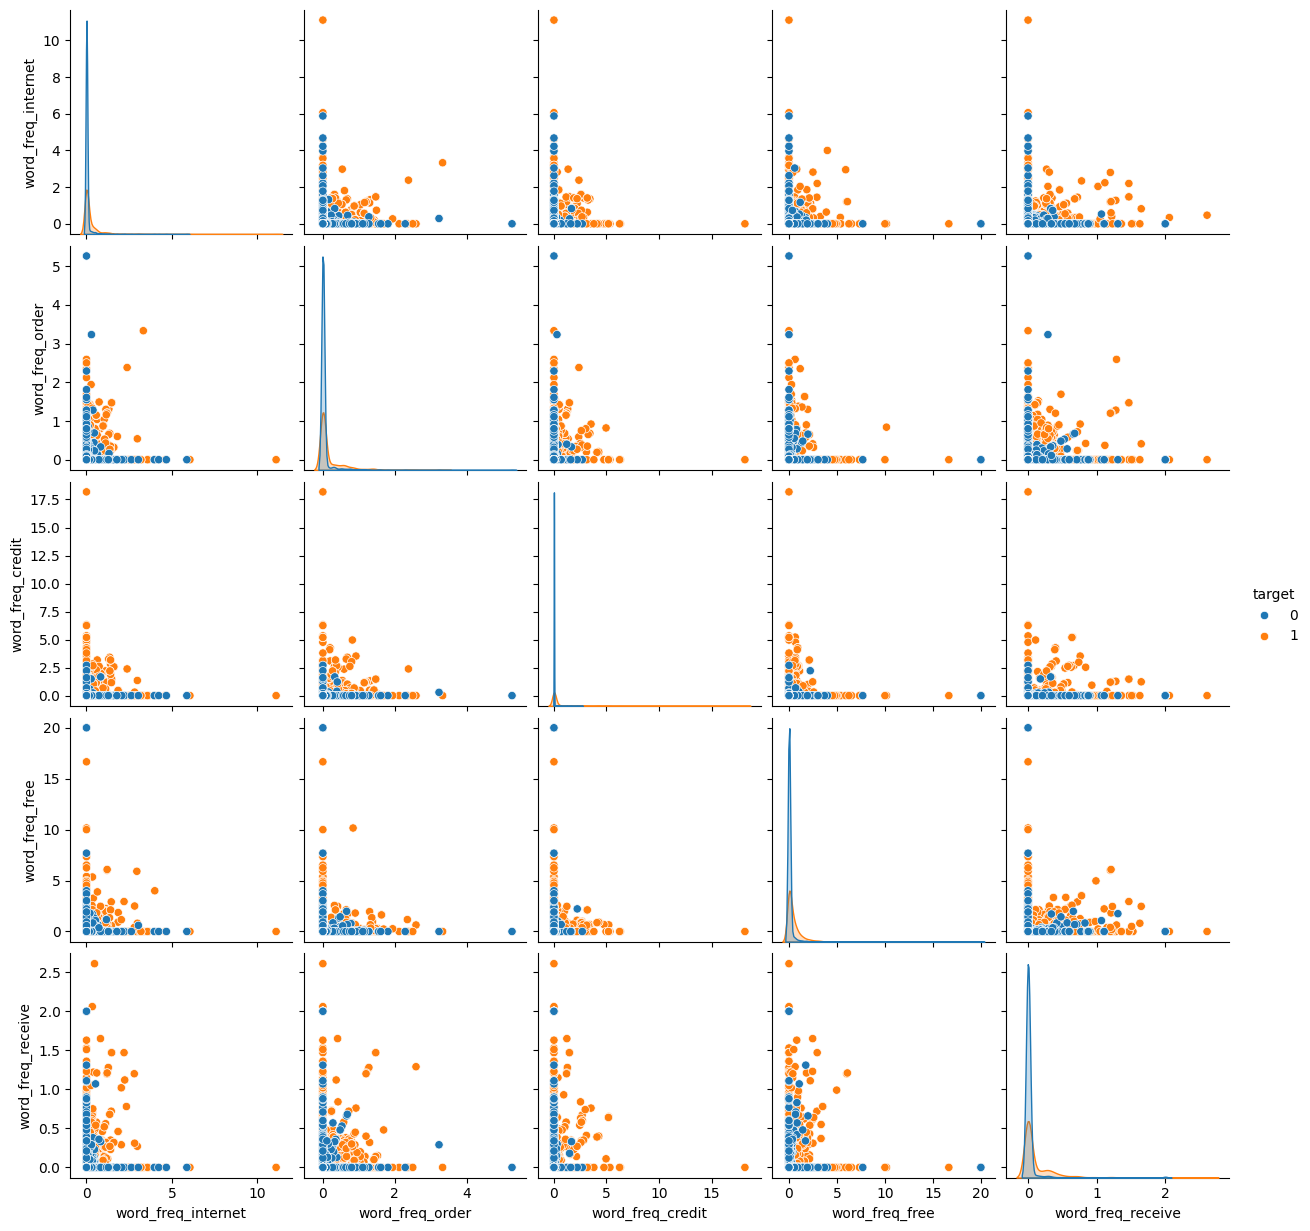

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is already a pandas DataFrame
# Choose up to 5 features for analysis
X_selected = X[['word_freq_internet', 'word_freq_order', 'word_freq_credit', 'word_freq_free', 'word_freq_receive']]
X_selected['target'] = y  # Add the target variable to the dataframe

# Compute the correlation matrix
corr_matrix = X_selected.corr()
print(corr_matrix)

# Pair plot for visualizing relationships
sns.pairplot(X_selected, hue='target')
plt.show()


### 3

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# X_selected is the selected feature matrix
X_selected = X[['word_freq_internet', 'word_freq_order', 'word_freq_credit', 'word_freq_free', 'word_freq_receive']]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [29]:

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\Induwara Gayashan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy: 0.75


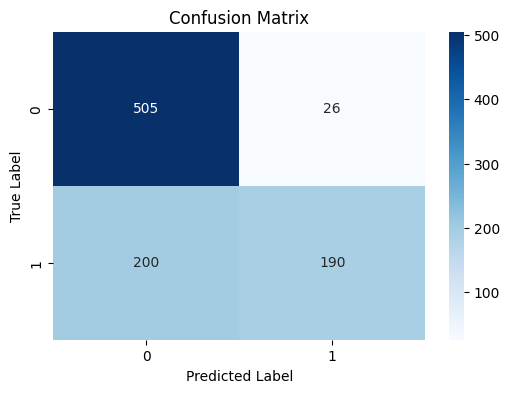

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



### 4

In [16]:
import statsmodels.api as sm

# Add a constant to the feature matrix (for the intercept term)
X_with_const = sm.add_constant(X_selected)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_const).fit()

# Print the summary (which includes p-values)
print(logit_model.summary())

# Interpretation: Look at the p-values column
# Features with p-values > 0.05 can potentially be discarded.


Optimization terminated successfully.
         Current function value: 0.529353
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4595
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2105
Time:                        12:34:28   Log-Likelihood:                -2435.6
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                1.027e-278
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2208      0.042    -28.991      0.000      -1.303      -1.138
word_

## 3, Logistic regression First/Second-Order Methods

### 1

In [33]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs
# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np . dot (X , transformation )

## 2

In [67]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function: Binary Cross Entropy
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    weights = np.random.randn(n+1)  # Random weight initialization
    
    losses = []
    
    for i in range(iterations):
        z = np.dot(X_b, weights)
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        # Gradient calculation
        gradients = (1/m) * np.dot(X_b.T, (y_pred - y))
        weights -= learning_rate * gradients  # Update weights

        # Print the loss at every iteration
        print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}")
    
    return weights, losses

# Running Batch Gradient Descent
weights, losses_batch = batch_gradient_descent(X, y)



Iteration 1/20, Loss: 0.6419
Iteration 2/20, Loss: 0.6407
Iteration 3/20, Loss: 0.6395
Iteration 4/20, Loss: 0.6383
Iteration 5/20, Loss: 0.6372
Iteration 6/20, Loss: 0.6362
Iteration 7/20, Loss: 0.6351
Iteration 8/20, Loss: 0.6341
Iteration 9/20, Loss: 0.6332
Iteration 10/20, Loss: 0.6322
Iteration 11/20, Loss: 0.6314
Iteration 12/20, Loss: 0.6305
Iteration 13/20, Loss: 0.6297
Iteration 14/20, Loss: 0.6289
Iteration 15/20, Loss: 0.6281
Iteration 16/20, Loss: 0.6273
Iteration 17/20, Loss: 0.6266
Iteration 18/20, Loss: 0.6259
Iteration 19/20, Loss: 0.6253
Iteration 20/20, Loss: 0.6246


### 4

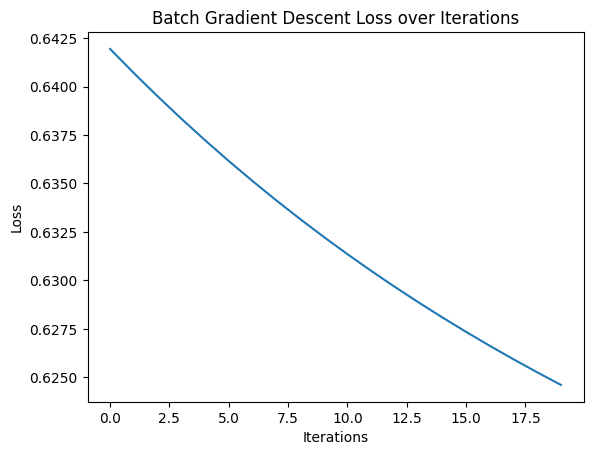

In [68]:
plt.plot(losses_batch)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent Loss over Iterations')
plt.show()

### 5

In [76]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    weights = np.random.randn(n+1)  # Random weight initialization
    
    losses = []
    
    for i in range(iterations):
        loss = 0
        for j in range(m):  # Loop through each sample
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            z = np.dot(xi, weights)
            y_pred = sigmoid(z)
            loss += compute_loss(yi, y_pred)
            
            # Gradient calculation
            gradients = np.dot(xi.T, (y_pred - yi))
            weights -= learning_rate * gradients  # Update weights

        
        losses.append(loss/m)

        # Print the loss at every iteration
        print(f"Iteration {i+1}/{iterations}, Loss: {loss/m:.4f}")
    
    return weights, losses

# Running Stochastic Gradient Descent
weights_sgd, losses_sgd = stochastic_gradient_descent(X, y)


Iteration 1/20, Loss: 0.3814
Iteration 2/20, Loss: 0.3197
Iteration 3/20, Loss: 0.3102
Iteration 4/20, Loss: 0.3094
Iteration 5/20, Loss: 0.2816
Iteration 6/20, Loss: 0.2878
Iteration 7/20, Loss: 0.2955
Iteration 8/20, Loss: 0.2577
Iteration 9/20, Loss: 0.2783
Iteration 10/20, Loss: 0.2746
Iteration 11/20, Loss: 0.2776
Iteration 12/20, Loss: 0.2971
Iteration 13/20, Loss: 0.2671
Iteration 14/20, Loss: 0.2867
Iteration 15/20, Loss: 0.2509
Iteration 16/20, Loss: 0.2674
Iteration 17/20, Loss: 0.2619
Iteration 18/20, Loss: 0.2560
Iteration 19/20, Loss: 0.2736
Iteration 20/20, Loss: 0.2451


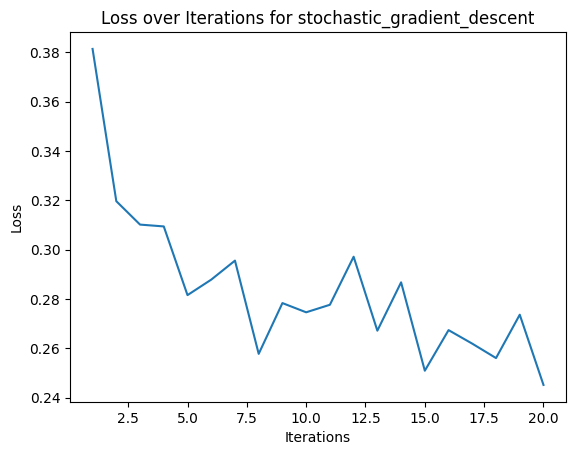

In [77]:
# Plot loss over iterations
plt.plot(range(1, 21), losses_sgd, label='Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for stochastic_gradient_descent')
plt.show()

### 6

In [83]:
# Hessian computation for Newton's Method
def hessian(X_b, y_pred):
    m = len(y_pred)
    S = np.diag(y_pred * (1 - y_pred))  # Diagonal matrix
    return (1/m) * np.dot(X_b.T, np.dot(S, X_b))

# Newton's Method
def newtons_method(X, y, iterations=20):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    weights = np.random.randn(n+1)  # Random weight initialization
    
    losses = []
    
    for i in range(iterations):
        z = np.dot(X_b, weights)
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        # Gradient calculation
        gradients = (1/m) * np.dot(X_b.T, (y_pred - y))
        
        # Hessian calculation
        H = hessian(X_b, y_pred)
        
        # Update weights using Newton's method: w = w - H^-1 * gradient
        weights -= np.linalg.inv(H).dot(gradients)

        # Print the loss at every iteration
        print(f"Iteration {i+1}/{iterations}, Loss: {loss/m:.4f}")
    
    return weights, losses

# Running Newton's Method
weights_newton, losses_newton = newtons_method(X, y)


Iteration 1/20, Loss: 0.0003
Iteration 2/20, Loss: 0.0002
Iteration 3/20, Loss: 0.0001
Iteration 4/20, Loss: 0.0001
Iteration 5/20, Loss: 0.0001
Iteration 6/20, Loss: 0.0001
Iteration 7/20, Loss: 0.0001
Iteration 8/20, Loss: 0.0001
Iteration 9/20, Loss: 0.0001
Iteration 10/20, Loss: 0.0001
Iteration 11/20, Loss: 0.0001
Iteration 12/20, Loss: 0.0001
Iteration 13/20, Loss: 0.0001
Iteration 14/20, Loss: 0.0001
Iteration 15/20, Loss: 0.0001
Iteration 16/20, Loss: 0.0001
Iteration 17/20, Loss: 0.0001
Iteration 18/20, Loss: 0.0001
Iteration 19/20, Loss: 0.0001
Iteration 20/20, Loss: 0.0001


### 7

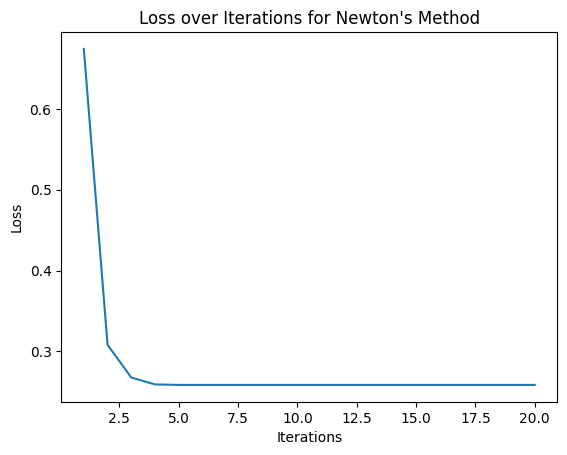

In [85]:
# Plot loss over iterations
plt.plot(range(1, 21), losses_newton, label='Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Newton\'s Method')
plt.show()

### 8

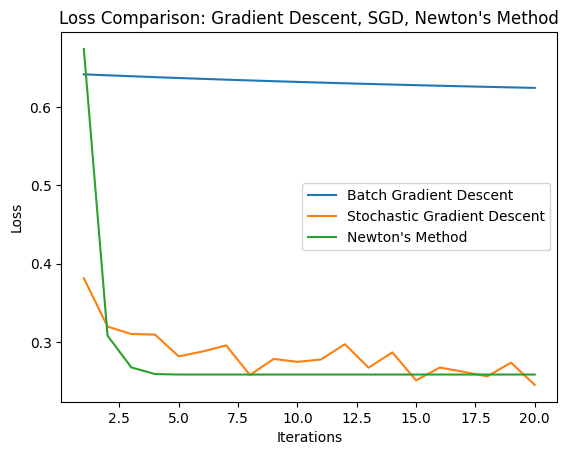

In [86]:
plt.plot(range(1, 21), losses_batch, label='Batch Gradient Descent')
plt.plot(range(1, 21), losses_sgd, label='Stochastic Gradient Descent')
plt.plot(range(1, 21), losses_newton, label='Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison: Gradient Descent, SGD, Newton\'s Method')
plt.show()

### 10

Iteration 1/20, Loss: 0.8116
Iteration 2/20, Loss: 0.8074
Iteration 3/20, Loss: 0.8034
Iteration 4/20, Loss: 0.7996
Iteration 5/20, Loss: 0.7961
Iteration 6/20, Loss: 0.7928
Iteration 7/20, Loss: 0.7896
Iteration 8/20, Loss: 0.7866
Iteration 9/20, Loss: 0.7838
Iteration 10/20, Loss: 0.7811
Iteration 11/20, Loss: 0.7786
Iteration 12/20, Loss: 0.7761
Iteration 13/20, Loss: 0.7738
Iteration 14/20, Loss: 0.7716
Iteration 15/20, Loss: 0.7694
Iteration 16/20, Loss: 0.7674
Iteration 17/20, Loss: 0.7654
Iteration 18/20, Loss: 0.7635
Iteration 19/20, Loss: 0.7617
Iteration 20/20, Loss: 0.7599


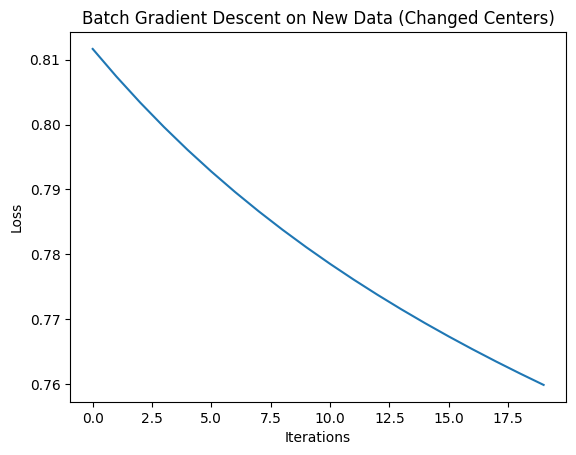

In [90]:
# Changing the centers and generating new data
centers_new = [[3, 0], [5, 1.5]]
X_new, y_new = make_blobs(n_samples=2000, centers=centers_new, random_state=5)
X_new = np.dot(X_new, transformation)

# Running Batch Gradient Descent on new data
weights_new_data, losses_new_data = batch_gradient_descent(X_new, y_new)

# Plotting loss
plt.plot(losses_new_data)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent on New Data (Changed Centers)')
plt.show()


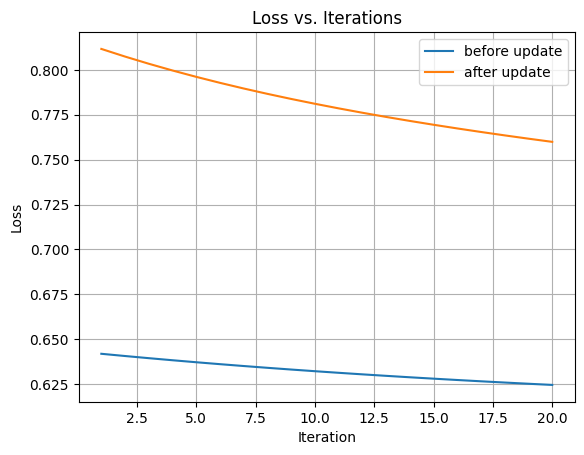

In [98]:
plt.plot(range(1, 21), losses_batch, label = 'before update')
plt.plot(range(1, 21), losses_new_data, label = 'after update')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.legend()
plt.show()